In [ ]:
#import libraries
!pip install yfinance 
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')
import yfinance  as yf

     |████████████████████████████████| 6.4 MB 5.8 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
#getting the stocks datasets

# tickerSymbol = 'AAPL' #apple
tickerSymbol = 'TCS'

#get data on this ticker

tickerData = yf.Ticker(tickerSymbol) #get the stock data using ticker

#get the historical prices for this ticker

df = tickerData.history(period='1d', start='2010-1-1', end='2022-12-25')

#show the dataset
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-11-01,32.717391,34.586956,30.006520,33.839130,14667600,0.0,0
2013-11-04,34.399999,34.399999,32.427607,33.044563,1586600,0.0,0
2013-11-05,32.820217,33.184782,32.549130,33.044563,337700,0.0,0
2013-11-06,33.287609,34.110219,33.287609,33.558697,549600,0.0,0
2013-11-07,34.400000,34.400000,31.894782,33.007175,883700,0.0,0
...,...,...,...,...,...,...,...
2022-01-05,11.490000,11.490000,10.920000,10.990000,944100,0.0,0
2022-01-06,11.260000,11.580000,11.020000,11.350000,633500,0.0,0
2022-01-07,11.300000,11.550000,11.090000,11.200000,515700,0.0,0


In [ ]:
df.shape

(2063, 7)

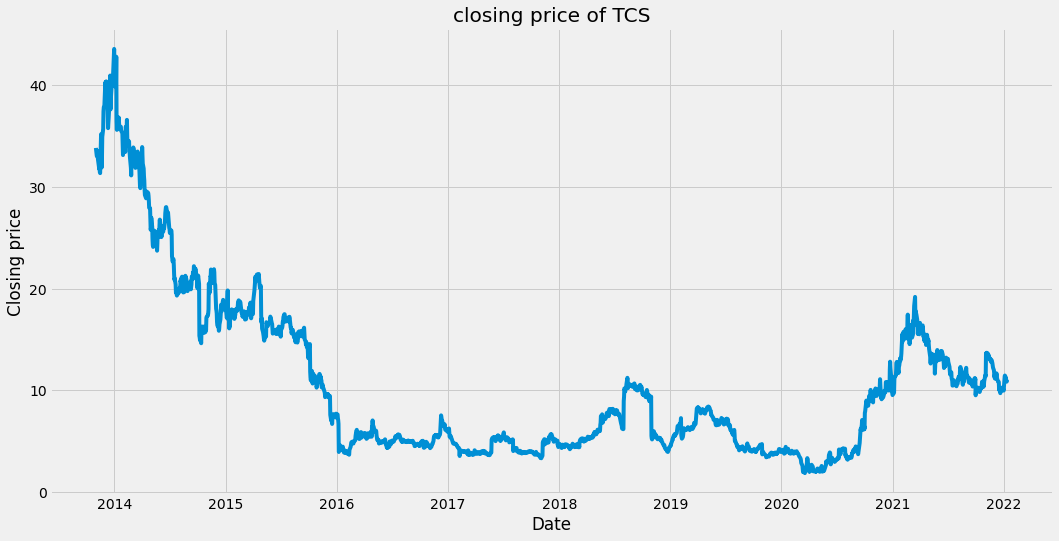

In [ ]:
#visualize the closing prices
plt.figure(figsize=(16,8))
plt.title('closing price of TCS')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.show()

In [ ]:
#create new database with only required coloumns
data=df.filter(['Close'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train 80 percent
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

1651

In [ ]:
#scale the data
scaler=StandardScaler()
#y = (x – mean) / standard_deviation
# It makes total mean =0
# and data to unit deviation 
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  -1.1021506322987497e-16
Standard deviation of processed data:  0.9999999999999999


In [ ]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])

In [ ]:
#convert x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(1591, 60, 1)

In [ ]:
#reshape the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (1591, 60, 1)
x_train shape after reshaping (1591, 60, 1)


In [ ]:
#build LSTM model
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1)) 

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507,601
Trainable params: 507,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history = model.fit(x_train,y_train,epochs=20)

Epoch 1/20
50/50 [==============================] - 9s 42ms/step - loss: 0.0378
Epoch 2/20
50/50 [==============================] - 2s 36ms/step - loss: 0.0118
Epoch 3/20
50/50 [==============================] - 2s 35ms/step - loss: 0.0082
Epoch 4/20
50/50 [==============================] - 2s 34ms/step - loss: 0.0074
Epoch 5/20
50/50 [==============================] - 2s 34ms/step - loss: 0.0066
Epoch 6/20
50/50 [==============================] - 2s 33ms/step - loss: 0.0059
Epoch 7/20
50/50 [==============================] - 2s 33ms/step - loss: 0.0060
Epoch 8/20
50/50 [==============================] - 2s 33ms/step - loss: 0.0067
Epoch 9/20
50/50 [==============================] - 2s 33ms/step - loss: 0.0060
Epoch 10/20
50/50 [==============================] - 2s 32ms/step - loss: 0.0047
Epoch 11/20
50/50 [==============================] - 2s 32ms/step - loss: 0.0044
Epoch 12/20
50/50 [==============================] - 2s 32ms/step - loss: 0.0042
Epoch 13/20
50/50 [==================

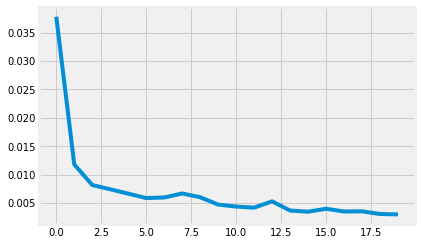

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert the data to numpy 
x_test=np.array(x_test)

In [ ]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
# print(predictions)

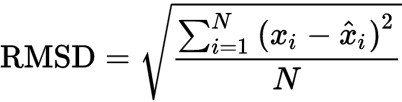

In [ ]:
#geting the root_mean_squared error(RMSE)
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test, predictions))
rmse

0.5069118321383526

In [ ]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


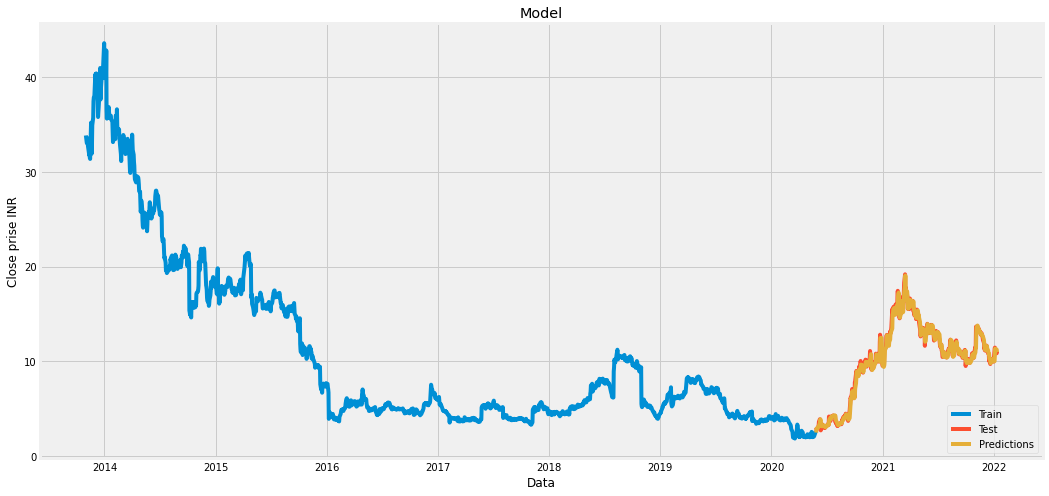

In [ ]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Close prise INR')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Test','Predictions'],loc='lower right')
plt.show()

In [ ]:
#show the valid and predicted value
valid

,Close,Predictions
Date,,
2020-05-27,3.02,2.500475
2020-05-28,2.83,2.834696
2020-05-29,2.85,2.947940
2020-06-01,3.03,2.968672
2020-06-02,2.99,3.041132
...,...,...
2022-01-05,10.99,11.342563
2022-01-06,11.35,11.211284
2022-01-07,11.20,11.306164
